In [1]:
# 세팅
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

# 버거지수 분석
## 1. 버거킹 데이터 정리
- 시도, 구군 별 매장 개수

In [3]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\버거데이터 전처리전\버거킹.xlsx'
bgk_df = pd.read_excel(path)

In [5]:
bgk_df['ADDR_2'].unique()

array([' ', 'B동 1층 118호, 119호, 120호, 134호'], dtype=object)

In [9]:
# 시도 데이터 뽑아보기

bgk_df['ADDR_1'].apply( lambda x: x.split(' ')[0]).unique()

array(['대구광역시', '인천광역시', '경기도', '부산광역시', '서울특별시', '강원도', '전라북도', '대전광역시',
       '울산광역시', '광주광역시', '경상북도', '경상남도', '전라남도', '충청남도', '충청북도', '',
       '세종특별자치시', '서울시', '제주특별자치도'], dtype=object)

In [11]:
bgk_df[ bgk_df['ADDR_1'].apply( lambda x: x.split(' ')[0]) == '' ]

,STOR_COORD_Y,STOR_COORD_X,ADDR_1,ADDR_2,STOR_NM
171,36.123205,128.362378,경상북도 구미시 구미대로 409,,구미신평점


In [14]:
bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[0]).unique()

array(['대구광역시', '인천광역시', '경기도', '부산광역시', '서울특별시', '강원도', '전라북도', '대전광역시',
       '울산광역시', '광주광역시', '경상북도', '경상남도', '전라남도', '충청남도', '충청북도',
       '세종특별자치시', '서울시', '제주특별자치도'], dtype=object)

In [19]:
def short_sido(x):
    if len(x)==4:
        return x[0]+x[2]
    else:
        return x[:2]

In [20]:
# 주소 문자열 앞에 공백이 있는 문제 해결
# 시도 단위를 2글자로 줄이기

bgk_df['sido'] = bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[0]).apply(short_sido)

In [21]:
bgk_df

,STOR_COORD_Y,STOR_COORD_X,ADDR_1,ADDR_2,STOR_NM,sido
0,35.817936,128.535470,대구광역시 달서구 월배로 200,,상인SK점,대구
1,37.516489,126.731842,인천광역시 부평구 장제로 347,,삼산SK점,인천
2,37.363166,127.114437,경기도 성남시 분당구 정자로 88,,분당상록점,경기
3,35.155101,129.059731,부산광역시 부산진구 서전로10번길 64,,부산태화점,부산
4,37.652775,127.051368,서울특별시 도봉구 노해로 389,,창동역점,서울
...,...,...,...,...,...,...
443,37.383289,126.642261,인천광역시 연수구 하모니로 158,,송도타임스페이스점,인천
444,37.563961,127.193600,경기도 하남시 미사강변동로 100-1,,미사역파라곤스퀘어점,경기
445,36.991293,127.089611,경기도 평택시 평택로32번길 34,,평택로데오점,경기
446,35.942381,128.616052,대구광역시 북구 동화천로 229,,대구연경점,대구


In [22]:
# 구군 파트

bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[1]).unique()

array(['달서구', '부평구', '성남시', '부산진구', '도봉구', '화성시', '영등포구', '시흥시', '서대문구',
       '수원시', '종로구', '남구', '강동구', '용인시', '계양구', '강북구', '춘천시', '군산시',
       '강남구', '구로구', '의정부시', '북구', '서구', '김포시', '전주시', '안양시', '속초시',
       '유성구', '중구', '파주시', '송파구', '고양시', '동작구', '연수구', '동구', '과천시', '양천구',
       '김천시', '수성구', '정읍시', '성북구', '창원시', '동대문구', '거제시', '광양시', '서산시',
       '해운대구', '포항시', '남동구', '천안시', '오산시', '무안군', '금정구', '관악구', '부천시',
       '구미시', '나주시', '강릉시', '이천시', '목포시', '경주시', '구리시', '은평구', '광진구',
       '김해시', '서초구', '평택시', '강서구', '마포구', '사상구', '경산시', '안동시', '익산시',
       '남양주시', '광명시', '중랑구', '노원구', '하남시', '광산구', '금천구', '진천군', '동래구',
       '기장군', '성동구', '보듬5로', '광주시', '양산시', '청주시', '충주시', '안산시', '청원군',
       '원주시', '상주시', '순천시', '동두천시', '홍천군', '안성시', '달성군', '용산구', '여수시',
       '당진시', '어울로', '진주시', '사하구', '사천시', '연제구', '한누리대로', '양평군', '홍성군',
       '양주시', '영주시', '보령시', '미추홀구', '군포시', '포천시', '보듬3로', '음성군', '제주시',
       '영도구', '제천시', '세종로', '칠곡군', '거창군'], dtype=object)

In [26]:
# 세종은 예외 (시 밑에 구군이 없음)
# 세종은 시도, 구군 모두 '세종' <= 예외처리

bgk_df[ bgk_df['sido'] == '세종' ]

,STOR_COORD_Y,STOR_COORD_X,ADDR_1,ADDR_2,STOR_NM,sido
176,36.516726,127.258386,세종특별자치시 보듬5로 6,,충남대병원DT점,세종
272,36.481958,127.253939,세종특별자치시 어울로 77세종,,세종행복새롬점,세종
290,36.490569,127.302849,세종특별자치시 한누리대로 1948,,세종반곡점,세종
373,36.512236,127.242659,세종특별자치시 보듬3로 154,,세종고운점,세종
414,36.478494,127.287376,세종특별자치시 한누리대로 2150,,세종시청점,세종
416,36.603726,127.289304,세종특별자치시 세종로 2425,,세종조치원DT점,세종


In [29]:
# 구군 데이터를 잘라오자

bgk_df['gugun'] = bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[1]) 

In [35]:
bgk_df.loc[ bgk_df['sido']=='세종', 'gugun' ] = '세종'

In [36]:
bgk_df[bgk_df['sido']=='세종']

,STOR_COORD_Y,STOR_COORD_X,ADDR_1,ADDR_2,STOR_NM,sido,gugun
176,36.516726,127.258386,세종특별자치시 보듬5로 6,,충남대병원DT점,세종,세종
272,36.481958,127.253939,세종특별자치시 어울로 77세종,,세종행복새롬점,세종,세종
290,36.490569,127.302849,세종특별자치시 한누리대로 1948,,세종반곡점,세종,세종
373,36.512236,127.242659,세종특별자치시 보듬3로 154,,세종고운점,세종,세종
414,36.478494,127.287376,세종특별자치시 한누리대로 2150,,세종시청점,세종,세종
416,36.603726,127.289304,세종특별자치시 세종로 2425,,세종조치원DT점,세종,세종


In [37]:
bgk_df['gugun'].unique()

array(['달서구', '부평구', '성남시', '부산진구', '도봉구', '화성시', '영등포구', '시흥시', '서대문구',
       '수원시', '종로구', '남구', '강동구', '용인시', '계양구', '강북구', '춘천시', '군산시',
       '강남구', '구로구', '의정부시', '북구', '서구', '김포시', '전주시', '안양시', '속초시',
       '유성구', '중구', '파주시', '송파구', '고양시', '동작구', '연수구', '동구', '과천시', '양천구',
       '김천시', '수성구', '정읍시', '성북구', '창원시', '동대문구', '거제시', '광양시', '서산시',
       '해운대구', '포항시', '남동구', '천안시', '오산시', '무안군', '금정구', '관악구', '부천시',
       '구미시', '나주시', '강릉시', '이천시', '목포시', '경주시', '구리시', '은평구', '광진구',
       '김해시', '서초구', '평택시', '강서구', '마포구', '사상구', '경산시', '안동시', '익산시',
       '남양주시', '광명시', '중랑구', '노원구', '하남시', '광산구', '금천구', '진천군', '동래구',
       '기장군', '성동구', '세종', '광주시', '양산시', '청주시', '충주시', '안산시', '청원군',
       '원주시', '상주시', '순천시', '동두천시', '홍천군', '안성시', '달성군', '용산구', '여수시',
       '당진시', '진주시', '사하구', '사천시', '연제구', '양평군', '홍성군', '양주시', '영주시',
       '보령시', '미추홀구', '군포시', '포천시', '음성군', '제주시', '영도구', '제천시', '칠곡군',
       '거창군'], dtype=object)

In [38]:
bgk_df

,STOR_COORD_Y,STOR_COORD_X,ADDR_1,ADDR_2,STOR_NM,sido,gugun
0,35.817936,128.535470,대구광역시 달서구 월배로 200,,상인SK점,대구,달서구
1,37.516489,126.731842,인천광역시 부평구 장제로 347,,삼산SK점,인천,부평구
2,37.363166,127.114437,경기도 성남시 분당구 정자로 88,,분당상록점,경기,성남시
3,35.155101,129.059731,부산광역시 부산진구 서전로10번길 64,,부산태화점,부산,부산진구
4,37.652775,127.051368,서울특별시 도봉구 노해로 389,,창동역점,서울,도봉구
...,...,...,...,...,...,...,...
443,37.383289,126.642261,인천광역시 연수구 하모니로 158,,송도타임스페이스점,인천,연수구
444,37.563961,127.193600,경기도 하남시 미사강변동로 100-1,,미사역파라곤스퀘어점,경기,하남시
445,36.991293,127.089611,경기도 평택시 평택로32번길 34,,평택로데오점,경기,평택시
446,35.942381,128.616052,대구광역시 북구 동화천로 229,,대구연경점,대구,북구


In [50]:
# groupby를 이용해서 시도, 구군 별 매장 개수

bgk_result = bgk_df.groupby(['sido', 'gugun']).count()['STOR_NM'].reset_index()

bgk_result = bgk_result.rename({'STOR_NM':'BGK_N'}, axis=1)

In [51]:
bgk_result

,sido,gugun,BGK_N
0,강원,강릉시,1
1,강원,속초시,1
2,강원,원주시,3
3,강원,춘천시,2
4,강원,홍천군,2
...,...,...,...
131,충북,제천시,1
132,충북,진천군,1
133,충북,청원군,1
134,충북,청주시,7


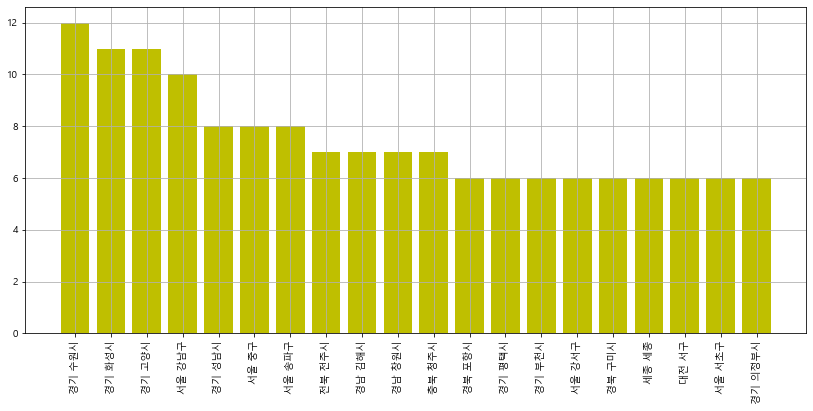

In [55]:
# 버거킹 매장 개수 top 20

temp = bgk_result.sort_values('BGK_N', ascending=False)[:20]

x = temp['sido'] + ' ' +temp['gugun']
y = temp['BGK_N']

plt.figure(figsize=(14,6))

plt.bar(x, y, color='y')
plt.xticks(rotation=90)
plt.grid()

plt.show()

## 2. 롯데리아 데이터 정리

In [57]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\버거데이터 전처리전\롯데리아.xlsx'
lttr_df = pd.read_excel(path)

In [60]:
# 시도 데이터 추출

lttr_df['addr'].apply( lambda x: x.strip().split(' ')[0]).unique()

array(['충남', '대전', '세종', '경기', '부산', '대구', '경북', '서울', '경남', '전남', '인천',
       '제주', '울산', '강원', '굽은다리역', '충북', '광주', '전북', '경기도', '충청북도', '경상남도',
       '전라북도', '진안군', '인천공항', '동대문구', '부산광역시', '경남남도', '문경새재도립공원',
       '번동사거리', '대전시', '롯데마트', '동해시', '중곡동', '지하철', '강남역', '방학',
       '광혜원시외버스정류장', '성수역1번출구', '서울시', '용인시', '홈배달', '수완지구', '별곡리', '부산시',
       '백마역', '2호선', '청량리역3번출구', '충청남도', '회룡역', '진건초등학교', '두정역에서', '죽곡',
       '주례역', '야탑역4번출구', '창원시', '대우자동차', '동암남로', '광주광역시', '화성시', '단계동',
       '까치산역3번출구에서', '잠실', '천안시', '모래내시장', '남항동', '순천연향동', '논산', '부천시',
       '금촌역', '대전광역시', '강원도', '제천시'], dtype=object)

In [61]:
lttr_df[lttr_df['addr'].apply( lambda x: x.strip().split(' ')[0]) == '광혜원시외버스정류장']

,name,addr
669,광혜원,광혜원시외버스정류장 맞은편


In [70]:
lttr_df [lttr_df['addr'].apply( lambda x: x.strip().split(' ')[0]).apply( lambda x: len(x)>3 )]

,name,addr,sido
53,홈플러스강동,서울특별시 강동구,서울
119,청주테크노폴리스,충청북도 청주시 흥덕구 송화로 172-1,충북
125,마산로봇랜드,경상남도 창원시 마산합포구 구산면 로봇랜드로 1층,경남
126,전주에코,전라북도 전주시 덕진구 세병남로 롯데리아,전북
380,롯데아울렛동부산1층,부산광역시 기장군 기장해안로147 동부산롯데아울렛 A130,부산
470,경남함안,경남남도 함안군 성내남길 7-4,경남
504,문경새재,경상북도 문경시,경북
653,부산미남역,부산광역시 동래구,부산
669,광혜원,충청북도 진천군,충북
712,광주수완,광주광역시 광산구,광주


In [62]:
# 시도를 잘라보니까 잘못 들어간 주소들이 많아서 손으로 작업

lttr_df.loc[53, 'addr']= '서울특별시 강동구'
lttr_df.loc[156, 'addr']= '전북 진안군'
lttr_df.loc[211, 'addr']= '인천 중구'
lttr_df.loc[267, 'addr']= '서울 동대문구'
lttr_df.loc[359, 'addr']= '서울 동대문구'
lttr_df.loc[504, 'addr']= '경상북도 문경시'
lttr_df.loc[526, 'addr']= '서울 강북구'
lttr_df.loc[610, 'addr']= '경기 수원시'
lttr_df.loc[616, 'addr']= '강원도 동해시'
lttr_df.loc[642, 'addr']= '서울 광진구'
lttr_df.loc[653, 'addr']= '부산광역시 동래구'
lttr_df.loc[655, 'addr']= '서울 강남구'
lttr_df.loc[658, 'addr']= '서울 도봉구'
lttr_df.loc[669, 'addr']= '충청북도 진천군'
lttr_df.loc[675, 'addr']= '서울 성수역'
lttr_df.loc[699, 'addr']= '경기도 용인시 수지구'
lttr_df.loc[705, 'addr']= '경기도 수원시 장안구'
lttr_df.loc[712, 'addr']= '광주광역시 광산구'
lttr_df.loc[715, 'addr']= '충청북도 단양군'
lttr_df.loc[762, 'addr']= '경기도 고양시 일산동구'
lttr_df.loc[852, 'addr']= '서울시 관악구'
lttr_df.loc[855, 'addr']= '서울시 동대문구'
lttr_df.loc[886, 'addr']= '경기도 의정부시 호원동'
lttr_df.loc[891, 'addr']= '경기 남양주시 진건읍'
lttr_df.loc[948, 'addr']= '충남 천안시'
lttr_df.loc[978, 'addr']= '대구광역시 달성군 다사읍'
lttr_df.loc[981, 'addr']= '부산광역시 사상구'
lttr_df.loc[984, 'addr']= '경기도 성남시 분당구'
lttr_df.loc[998, 'addr']= '경남 창원시 의창구'
lttr_df.loc[1002, 'addr']= '인천 부평구 마장로'
lttr_df.loc[1017, 'addr']= '인천 부평구'
lttr_df.loc[1043, 'addr']= '경기 화성시 남양읍'
lttr_df.loc[1055, 'addr']= '강원도 원주시'
lttr_df.loc[1069, 'addr']= '서울시 강서구 화곡동'
lttr_df.loc[1094, 'addr']= '서울시 송파구 올림픽로'
lttr_df.loc[1140, 'addr']= '충남 천안시 서북구'
lttr_df.loc[1144, 'addr']= '인천광역시 남동구 구월동'
lttr_df.loc[1163, 'addr']= '부산광역시 영도구'
lttr_df.loc[1175, 'addr']= '전남 순천시 연향동'
lttr_df.loc[1210, 'addr']= '충남 논산시'
lttr_df.loc[1214, 'addr']= '경기도 부천시'
lttr_df.loc[1228, 'addr']= '경기 파주시'
lttr_df.loc[1262, 'addr']= '충북 제천시'

In [63]:
lttr_df['addr'].apply( lambda x: x.strip().split(' ')[0]).unique()

array(['충남', '대전', '세종', '경기', '부산', '대구', '경북', '서울', '경남', '전남', '인천',
       '제주', '울산', '강원', '서울특별시', '충북', '광주', '전북', '경기도', '충청북도', '경상남도',
       '전라북도', '부산광역시', '경남남도', '경상북도', '대전시', '강원도', '서울시', '광주광역시',
       '부산시', '충청남도', '대구광역시', '인천광역시', '대전광역시'], dtype=object)

In [66]:
lttr_df['sido'] = lttr_df['addr'].apply( lambda x: x.strip().split(' ')[0]).apply( short_sido )

In [67]:
# 구군 파트

lttr_df['addr'].apply( lambda x: x.strip().split(' ')[1]).unique()

array(['천안시', '유성구', '', '성남시', '대덕구', '기장군', '용인시', '수성구', '화성시', '평택시',
       '포항시', '마포구', '안성시', '창원시', '순천시', '남구', '동래구', '고양시', '서귀포시',
       '북구', '양산시', '광주시', '춘천시', '부평구', '가평군', '아산시', '수원시', '여수시',
       '김포시', '양천구', '달서구', '진주시', '영암군', '안산시', '의정부시', '김해시', '연수구',
       '광명시', '문경시', '서초구', '서구', '원주시', '무안군', '시흥시', '강동구', '서천군',
       '청주시', '남양주시', '동구', '논산시', '사하구', '구미시', '충주시', '안양시', '양양군',
       '제주시', '홍천군', '전주시', '용산구', '이천시', '은평구', '강서구', '거제시', '산청군',
       '군포시', '서대문구', '달성군', '중구', '과천시', '진도군', '남동구', '평창군', '당진시',
       '의령군', '익산시', '제천시', '부천시', '광산구', '하남시', '진안군', '경산시', '노원구',
       '서산시', '파주시', '밀양시', '성동구', '금정구', '안동시', '의성군', '곡성군', '해운대구',
       '강남구', '부산진구', '영주시', '음성군', '금천구', '수영구', '구리시', '관악구', '동대문구',
       '장수군', '경주시', '보성군', '울릉군', '속초시', '인제군', '양주시', '울주군', '송파구',
       '영등포구', '오산시', '중랑구', '정읍시', '의왕시', '동작구', '고성군', '함평군', '김천시',
       '홍성군', '보령시', '구례군', '강북구', '당진군', '구로구', '강릉시', '여주시', '나주시금천면',
       '장성

In [73]:
lttr_df[lttr_df['addr'].apply( lambda x: x.strip().split(' ')[1]).apply(lambda x: len(x) > 4)]

,name,addr,sido
384,나주혁신,전남 나주시금천면 빛가람로 189-1,전남
386,전남장성,전남 장성군장성읍 영천로 166,전남
422,전남고흥,전남 고흥군고흥읍 여산당촌길 8,전남
436,논산연무,충남 논산시연무읍 안심로 152,충남
444,임실,전북 임실군임실읍 운수로 19,전북
450,경남남지,경남 창녕군남지읍 문화길 35-4,경남
1121,마석,경기 남양주시화도읍 마석로 14,경기


In [76]:
# 구군 데이터를 처리하기 위한 수작업

lttr_df['gugun'] = lttr_df['addr'].apply( lambda x: x.strip().split(' ')[1])

lttr_df.loc[ lttr_df['gugun'] == '' , 'gugun'] = '세종'
lttr_df.loc[ 384, 'gugun'] = '나주시'
lttr_df.loc[ 386, 'gugun'] = '장성군'
lttr_df.loc[ 422, 'gugun'] = '고흥군'
lttr_df.loc[ 436, 'gugun'] = '논산시'
lttr_df.loc[ 444, 'gugun'] = '임실군'
lttr_df.loc[ 450, 'gugun'] = '창녕군'
lttr_df.loc[ 833, 'gugun'] = '세종'
lttr_df.loc[ 968, 'gugun'] = '종로구'
lttr_df.loc[ 1024, 'gugun'] = '구로구'
lttr_df.loc[ 1121, 'gugun'] = '남양주시'
lttr_df.loc[ 768, 'gugun'] = ' 서구'
lttr_df.loc[ 1063, 'gugun'] = ' 북구'
lttr_df.loc[ 1260, 'gugun'] = ' 동구'

In [78]:
lttr_df['gugun'].unique()

array(['천안시', '유성구', '세종', '성남시', '대덕구', '기장군', '용인시', '수성구', '화성시',
       '평택시', '포항시', '마포구', '안성시', '창원시', '순천시', '남구', '동래구', '고양시',
       '서귀포시', '북구', '양산시', '광주시', '춘천시', '부평구', '가평군', '아산시', '수원시',
       '여수시', '김포시', '양천구', '달서구', '진주시', '영암군', '안산시', '의정부시', '김해시',
       '연수구', '광명시', '문경시', '서초구', '서구', '원주시', '무안군', '시흥시', '강동구',
       '서천군', '청주시', '남양주시', '동구', '논산시', '사하구', '구미시', '충주시', '안양시',
       '양양군', '제주시', '홍천군', '전주시', '용산구', '이천시', '은평구', '강서구', '거제시',
       '산청군', '군포시', '서대문구', '달성군', '중구', '과천시', '진도군', '남동구', '평창군',
       '당진시', '의령군', '익산시', '제천시', '부천시', '광산구', '하남시', '진안군', '경산시',
       '노원구', '서산시', '파주시', '밀양시', '성동구', '금정구', '안동시', '의성군', '곡성군',
       '해운대구', '강남구', '부산진구', '영주시', '음성군', '금천구', '수영구', '구리시', '관악구',
       '동대문구', '장수군', '경주시', '보성군', '울릉군', '속초시', '인제군', '양주시', '울주군',
       '송파구', '영등포구', '오산시', '중랑구', '정읍시', '의왕시', '동작구', '고성군', '함평군',
       '김천시', '홍성군', '보령시', '구례군', '강북구', '당진군', '구로구', '강릉시', '여주시',
       '나주시', '장성군

In [82]:
# 시도 구군으로 데이터 집계

lttr_result = lttr_df.groupby(['sido', 'gugun']).count()['name'].reset_index()
lttr_result = lttr_result.rename({'name':'LTTR_N'}, axis=1)

In [100]:
# 롯데리아 top20 매장 수 집계
def show_top20(buger_df, col, title):
    temp = buger_df.sort_values(col, ascending=False)[:20]
    
    x = temp['sido'] + ' ' + temp['gugun']
    y = temp[col]

    plt.figure(figsize=(15, 4))

    plt.title(title, size=20, pad=15)
    plt.bar(x, y, color='salmon')

    plt.xticks(rotation=90)
    plt.grid()
    plt.show()

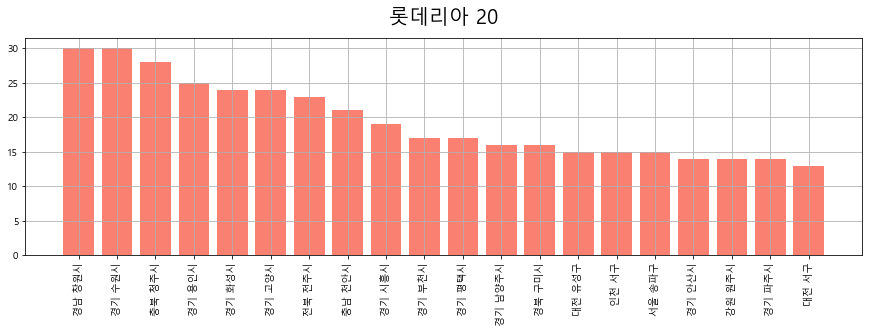

In [101]:
show_top20(lttr_result, 'LTTR_N', '롯데리아 20')

## 3. 중간점검

In [102]:
bgk_result.head(3)

,sido,gugun,BGK_N
0,강원,강릉시,1
1,강원,속초시,1
2,강원,원주시,3


In [103]:
lttr_result.head(3)

,sido,gugun,LTTR_N
0,강원,강릉시,6
1,강원,고성군,1
2,강원,동해시,3


In [104]:
pd.merge( bgk_result, lttr_result, on=['sido', 'gugun'], how='outer' )

,sido,gugun,BGK_N,LTTR_N
0,강원,강릉시,1.0,6.0
1,강원,속초시,1.0,3.0
2,강원,원주시,3.0,14.0
3,강원,춘천시,2.0,6.0
4,강원,홍천군,2.0,2.0
...,...,...,...,...
230,충북,보은군,NaN,1.0
231,충북,영동군,NaN,1.0
232,충북,옥천군,NaN,1.0
233,충북,증평군,NaN,1.0


## 4. KFC 데이터 정리

In [134]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\버거데이터 전처리전\kfc.xlsx'
kfc_df = pd.read_excel(path)

In [139]:
kfc_df.isna().sum()

store_address_sido     1
store_address_gugun    5
store_name             0
store_old_address      0
store_new_address      0
dtype: int64

In [169]:
# 시도 파트 - nan 처리
kfc_df[kfc_df['store_address_sido'].isna()]

kfc_df.loc[175, 'store_address_sido'] = '경남'
kfc_df.loc[175, 'store_address_gugun'] = '김해시'

In [170]:
# 구군 파트 - nan 처리
kfc_df [kfc_df['store_address_gugun'].isna()]

kfc_df.loc[87, 'store_address_gugun'] = '청주시'
kfc_df.loc[94, 'store_address_gugun'] = '천안시'
kfc_df.loc[97, 'store_address_gugun'] = '진주시'
kfc_df.loc[120, 'store_address_gugun'] = '용인시'

In [145]:
kfc_df['store_address_gugun'].unique()

array(['제주시', '연수구', '청주시 서원구', '동작구', '안산시 단원구', '고양시 일산동구', '노원구',
       '파주시', '서구', '용산구', '강동구', '남양주시', '양천구', '동구', '성남시 수정구', '하남시',
       '고양시 일산서구', '서초구', '관악구', '수성구', '유성구', '중랑구', '안성시', '성북구', '강서구',
       '군포시', '천안시 동남구', '북구', '사하구', '서대문구', '당진시', '고양시 덕양구', '중구',
       '은평구', '경산시', '포항시 남구', '안양시 만안구', '부천시 원미구', '사상구', '수원시 팔달구',
       '남구', '광명시', '마포구', '구리시', '동대문구', '송파구', '강남구', '영등포구', '용인시 수지구',
       '금천구', '달서구', '포항시 북구', '평택시', '춘천시', '청주시', '청주시 흥덕구', '종로구',
       '천안시 서북구', '천안시', '창원시 성산구', '창원시 의창구', '진주시', '성남시 분당구',
       '전주시 완산구', '남동구', '의정부시', '원주시', '도봉구', '용인시 처인구', '용인시 기흥구',
       '용인시', '성동구', '오산시', '수원시 영통구', '연제구', '양주시', '안양시 동안구', '아산시',
       '세종시', '광진구', '서귀포시', '부평구', '부천시 소사구', '부산진구', '해운대구', '금정구',
       '포천시', '강북구', '화성시', '김해시', '김포시', '구미시', '구로구', '광산구', '계양구'],
      dtype=object)

In [147]:
# 구군 파트 
kfc_df['store_address_gugun'] = kfc_df['store_address_gugun'].apply( lambda x: x.split(' ')[0] )

In [283]:
kfc_df[kfc_df['store_address_gugun']=='세종시']

kfc_df.loc[139, 'store_address_gugun'] = '세종'

In [284]:
kfc_result = kfc_df.groupby(['store_address_sido', 'store_address_gugun']).count()['store_name'].reset_index()
kfc_result.columns = ['sido', 'gugun', 'KFC_N']

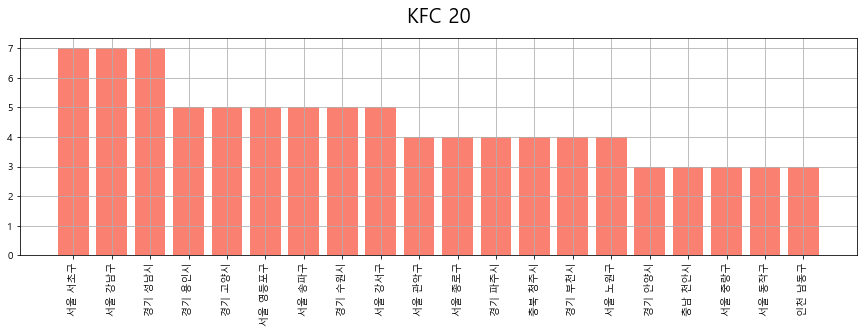

In [285]:
show_top20(kfc_result, 'KFC_N', 'KFC 20')

## 5. 맥도날드 데이터 정리

In [177]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\버거데이터 전처리전\맥도날드.xlsx'
mc_df = pd.read_excel(path)

In [178]:
mc_df.isna().sum()

name      0
addr_1    0
addr_2    0
dtype: int64

In [184]:
mc_df['sido'] = mc_df['addr_2'].apply( lambda x: x.strip().split(' ')[0]).apply( short_sido )

In [187]:
mc_df['gugun'] = mc_df['addr_2'].apply( lambda x: x.strip().split(' ')[1])

In [191]:
mc_result = mc_df.groupby(['sido', 'gugun']).count()['name'].reset_index()
mc_result = mc_result.rename({'name':'MC_N'}, axis=1)

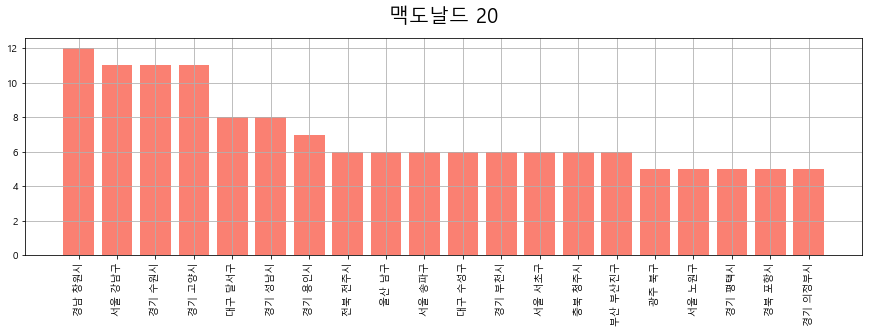

In [192]:
show_top20(mc_result, 'MC_N', '맥도날드 20')

## 6. 맘스터치 데이터 정리

In [218]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\버거데이터 전처리전\moms.xlsx'
moms_df = pd.read_excel(path)

In [219]:
moms_df[moms_df['addr'].apply( lambda x: x.strip().split(' ')[0]) == '소하동']

,name,addr
598,소하사거리점,소하동 920-5번지 1층


In [220]:
moms_df.loc[598, 'addr'] = '경기도 광명시'

In [221]:
moms_df['sido'] = moms_df['addr'].apply( lambda x: x.strip().split(' ')[0]).apply( short_sido )

In [224]:
moms_df['addr'].apply( lambda x: x.strip().split(' ')[1]).unique()

# '', 세종, '한라대학로'

array(['시흥시', '고양시', '금정구', '부산진구', '청주시', '의정부시', '송파구', '금천구', '강서구',
       '서대문구', '가평군', '남동구', '강남구', '용인시', '강동구', '강릉시', '고성군', '춘천시',
       '속초시', '영월군', '인제군', '태백시', '홍천군', '횡성군', '강진군', '구로구', '거제시',
       '광진구', '광주시', '거창군', '창원시', '사천시', '산청군', '하동군', '합천군', '고령군',
       '군위군', '예천군', '경산시', '성주군', '영덕군', '영천시', '의성군', '청도군', '진주시',
       '계양구', '경주시', '동대문구', '달서구', '계룡시', '성북구', '조치원읍', '영도구', '양주시',
       '안산시', '고흥군', '여수시', '공주시', '중구', '노원구', '과천시', '관악구', '안양시', '서구',
       '수원시', '광명시', '수영구', '광양시', '남구', '북구', '광산구', '성남시', '동구', '괴산군',
       '사하구', '파주시', '구례군', '구리시', '구미시', '은평구', '김해시', '울주군', '군산시',
       '군포시', '금산군', '김제시', '김천시', '김포시', '나주시', '동래구', '동작구', '무안군',
       '남양주시', '남원시', '남해군', '홍성군', '제주시', '완도군', '논산시', '담양군', '영등포구',
       '당진시', '달성군', '수성구', '해운대구', '유성구', '대덕구', '포천시', '보령시', '양산시',
       '강북구', '삼척시', '부천시', '동두천시', '화성시', '동해시', '아산시', '마포구', '중랑구',
       '양천구', '목포시', '문경시', '원주시', '하남시', '밀양시', '용산구', '부평구', '연제구',
  

In [225]:
moms_df[moms_df['sido']=='세종']

,name,addr,sido
92,고려대세종캠퍼스점,"세종특별자치시 조치원읍 내창1길 36, 1층",세종
585,세종CGV점,세종특별자치시 도움1로 108,세종
586,세종고운점,"세종특별자치시 마음로 70, 에셀프라자 106호",세종
587,세종나성점,"세종특별자치시 나성동 361-50, 어반아트리움 파인앤유퍼스트원",세종
588,세종대평점,"세종특별자치시 시청대로 20,1층",세종
589,세종도담점,"세종특별자치시 도담동 653(보듬4로 9),카림애비뉴1동 1층 43호",세종
590,세종반곡점,세종특별자치시 반곡동 42-1 LB-111호,세종
591,세종보람점,"세종특별자치시 남세종로 462, 103호",세종
592,세종부강점,세종특별자치시 부강면 부강4길 4번지 1층,세종
593,세종새롬점,세종시 새롬중앙로 55,세종


In [226]:
moms_df[moms_df['addr'].apply( lambda x: x.strip().split(' ')[1])=='']

,name,addr,sido
585,세종CGV점,세종특별자치시 도움1로 108,세종
586,세종고운점,"세종특별자치시 마음로 70, 에셀프라자 106호",세종
587,세종나성점,"세종특별자치시 나성동 361-50, 어반아트리움 파인앤유퍼스트원",세종
588,세종대평점,"세종특별자치시 시청대로 20,1층",세종
589,세종도담점,"세종특별자치시 도담동 653(보듬4로 9),카림애비뉴1동 1층 43호",세종
591,세종보람점,"세종특별자치시 남세종로 462, 103호",세종
594,세종아름점,"세종특별자치시 보듬3로 100, 해피리움1차 112호",세종
595,세종첫마을점,세종특별자치시 누리로 52 C동 B-112,세종
1117,조치원죽림점,세종특별자치시 조치원읍 죽림리 114-1 럭스스퀘어 201호,세종


In [227]:
moms_df['gugun'] = moms_df['addr'].apply( lambda x: x.strip().split(' ')[1])

In [228]:
moms_df.loc[ moms_df['sido']=='세종', 'gugun' ] = '세종'

In [229]:
moms_df.loc[ moms_df['gugun']=='한라대학로' , 'gugun'] = '제주시'

In [230]:
moms_df['gugun'].unique()

array(['시흥시', '고양시', '금정구', '부산진구', '청주시', '의정부시', '송파구', '금천구', '강서구',
       '서대문구', '가평군', '남동구', '강남구', '용인시', '강동구', '강릉시', '고성군', '춘천시',
       '속초시', '영월군', '인제군', '태백시', '홍천군', '횡성군', '강진군', '구로구', '거제시',
       '광진구', '광주시', '거창군', '창원시', '사천시', '산청군', '하동군', '합천군', '고령군',
       '군위군', '예천군', '경산시', '성주군', '영덕군', '영천시', '의성군', '청도군', '진주시',
       '계양구', '경주시', '동대문구', '달서구', '계룡시', '성북구', '세종', '영도구', '양주시',
       '안산시', '고흥군', '여수시', '공주시', '중구', '노원구', '과천시', '관악구', '안양시', '서구',
       '수원시', '광명시', '수영구', '광양시', '남구', '북구', '광산구', '성남시', '동구', '괴산군',
       '사하구', '파주시', '구례군', '구리시', '구미시', '은평구', '김해시', '울주군', '군산시',
       '군포시', '금산군', '김제시', '김천시', '김포시', '나주시', '동래구', '동작구', '무안군',
       '남양주시', '남원시', '남해군', '홍성군', '제주시', '완도군', '논산시', '담양군', '영등포구',
       '당진시', '달성군', '수성구', '해운대구', '유성구', '대덕구', '포천시', '보령시', '양산시',
       '강북구', '삼척시', '부천시', '동두천시', '화성시', '동해시', '아산시', '마포구', '중랑구',
       '양천구', '목포시', '문경시', '원주시', '하남시', '밀양시', '용산구', '부평구', '연제구',
    

In [235]:
moms_result = moms_df.groupby(['sido', 'gugun']).count()['name'].reset_index()
moms_result = moms_result.rename({'name':'MOMS_N'}, axis=1)

In [236]:
moms_result

,sido,gugun,MOMS_N
0,강원,강릉시,7
1,강원,고성군,1
2,강원,동해시,3
3,강원,삼척시,2
4,강원,속초시,3
...,...,...,...
211,충북,제천시,5
212,충북,증평군,1
213,충북,진천군,2
214,충북,청주시,34


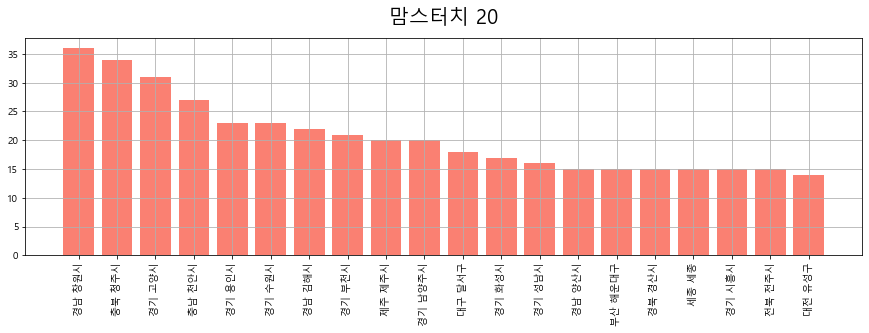

In [237]:
show_top20(moms_result, 'MOMS_N', '맘스터치 20')

## 7. 하나의 DF로 합치기

In [286]:
df_list = [bgk_result,
           lttr_result,
           kfc_result,
           mc_result,
           moms_result]

In [287]:
burger_df = 0

for df in df_list:
    if type(burger_df) == int:
        burger_df = df
    else:
        burger_df = pd.merge( burger_df, df, on=['sido', 'gugun'], how='outer' )

In [288]:
burger_df = burger_df.fillna( 0 )

# 버거 데이터 시각화하여 살펴보기

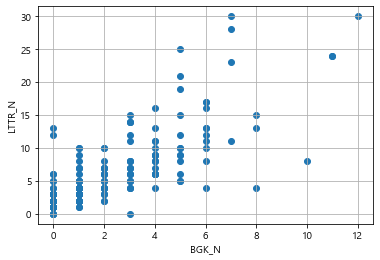

In [289]:
x = burger_df['BGK_N']
y = burger_df['LTTR_N']

plt.figure()

plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x, y)

plt.grid()
plt.show()

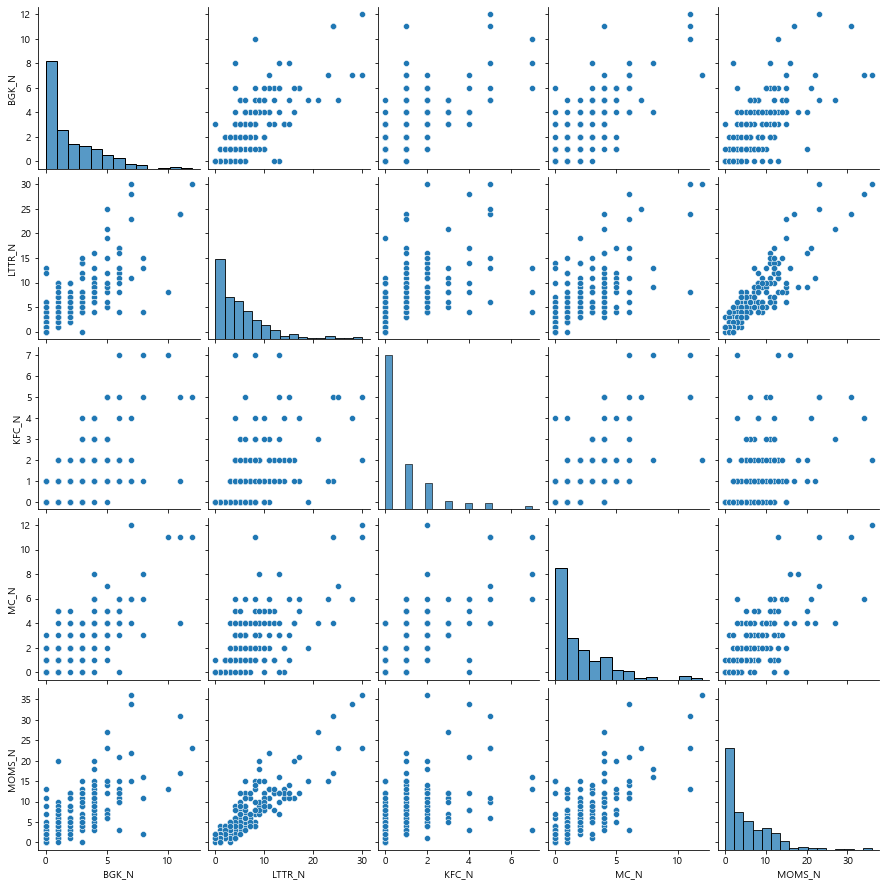

In [290]:
sns.pairplot(burger_df)

In [291]:
# 상관관계 계산

burger_df.corr()

,BGK_N,LTTR_N,KFC_N,MC_N,MOMS_N
BGK_N,1.000000,0.799182,0.745124,0.824803,0.751714
LTTR_N,0.799182,1.000000,0.603979,0.740998,0.898662
KFC_N,0.745124,0.603979,1.000000,0.746949,0.586143
MC_N,0.824803,0.740998,0.746949,1.000000,0.778705
MOMS_N,0.751714,0.898662,0.586143,0.778705,1.000000


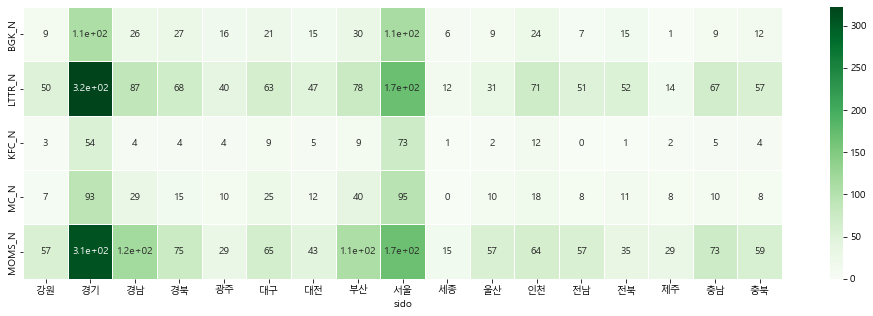

In [292]:
temp = burger_df.groupby('sido').sum().T

plt.figure(figsize=(17,5))

sns.heatmap( temp, cmap='Greens' , annot=True, linewidths=1, )

plt.show()

In [293]:
temp = burger_df.groupby('sido').sum()

for col in temp.columns:
    temp[col] = (temp[col] / temp[col].sum() * 100).round(2) 

In [294]:
temp

,BGK_N,LTTR_N,KFC_N,MC_N,MOMS_N
sido,,,,,
강원,2.01,3.91,1.56,1.75,4.19
경기,24.33,25.18,28.12,23.31,22.57
경남,5.80,6.80,2.08,7.27,8.75
경북,6.03,5.32,2.08,3.76,5.51
광주,3.57,3.13,2.08,2.51,2.13
대구,4.69,4.93,4.69,6.27,4.78
대전,3.35,3.67,2.60,3.01,3.16
부산,6.70,6.10,4.69,10.03,8.01
서울,25.00,13.21,38.02,23.81,12.28


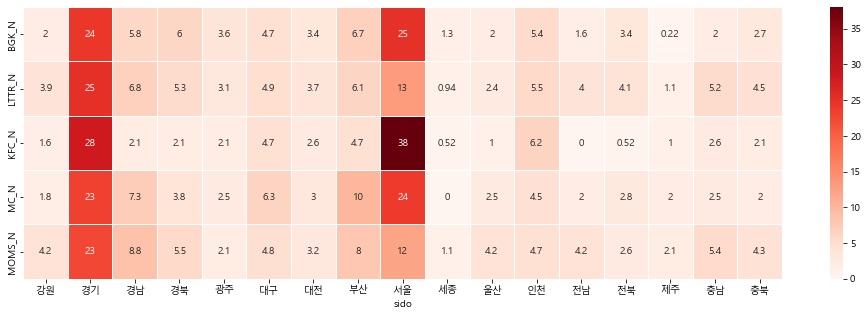

In [295]:
plt.figure(figsize=(17,5))

sns.heatmap( temp.T, cmap='Reds' , annot=True, linewidths=1, )

plt.show()

In [296]:
# 오리지날 버거지수 
burger_df['b_index1'] = (burger_df['BGK_N']+burger_df['KFC_N']+burger_df['MC_N']) / burger_df['LTTR_N']

# 맘스터치 버거지수
burger_df['b_index2'] = (burger_df['BGK_N']+burger_df['KFC_N']+burger_df['MC_N']) / burger_df['MOMS_N']

# 롯데이라 + 맘스터치 버거지수
burger_df['b_index3'] = (burger_df['BGK_N']+burger_df['KFC_N']+burger_df['MC_N']) / (burger_df['MOMS_N']+burger_df['LTTR_N'])

In [297]:
burger_df

,sido,gugun,BGK_N,LTTR_N,KFC_N,MC_N,MOMS_N,b_index1,b_index2,b_index3
0,강원,강릉시,1.0,6.0,0.0,1.0,7.0,0.333333,0.285714,0.153846
1,강원,속초시,1.0,3.0,0.0,1.0,3.0,0.666667,0.666667,0.333333
2,강원,원주시,3.0,14.0,1.0,2.0,11.0,0.428571,0.545455,0.240000
3,강원,춘천시,2.0,6.0,2.0,2.0,11.0,1.000000,0.545455,0.352941
4,강원,홍천군,2.0,2.0,0.0,0.0,1.0,1.000000,2.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...
234,충북,천안시,0.0,1.0,0.0,0.0,0.0,0.000000,NaN,0.000000
235,강원,정선군,0.0,0.0,0.0,0.0,2.0,NaN,0.000000,0.000000
236,경남,마산시,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0.000000
237,경북,군위군,0.0,0.0,0.0,0.0,1.0,NaN,0.000000,0.000000


In [298]:
burger_df.sort_values('b_index1', ascending=False)[:20]

,sido,gugun,BGK_N,LTTR_N,KFC_N,MC_N,MOMS_N,b_index1,b_index2,b_index3
109,인천,미추홀구,3.0,0.0,0.0,1.0,0.0,inf,inf,inf
91,서울,서초구,6.0,4.0,7.0,6.0,3.0,4.750000,6.333333,2.714286
77,서울,강남구,10.0,8.0,7.0,11.0,13.0,3.500000,2.153846,1.333333
99,서울,종로구,4.0,4.0,4.0,4.0,3.0,3.000000,4.000000,1.714286
100,서울,중구,8.0,4.0,1.0,3.0,2.0,3.000000,6.000000,2.000000
79,서울,강북구,2.0,3.0,1.0,4.0,4.0,2.333333,1.750000,1.000000
96,서울,영등포구,5.0,6.0,5.0,4.0,6.0,2.333333,2.333333,1.166667
95,서울,양천구,5.0,5.0,1.0,5.0,7.0,2.200000,1.571429,0.916667
84,서울,금천구,2.0,4.0,2.0,4.0,5.0,2.000000,1.600000,0.888889
90,서울,서대문구,5.0,5.0,2.0,3.0,6.0,2.000000,1.666667,0.909091


In [280]:
burger_df.sort_values('b_index1', ascending=True)[:20]

,sido,gugun,BGK_N,LTTR_N,KFC_N,MC_N,MOMS_N,b_index1,b_index2,b_index3
199,전남,장성군,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
184,세종,금남면,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
185,세종,연기면,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
136,강원,고성군,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
187,울산,을주군,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
188,인천,강화군,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
150,경기,연천군,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
190,전남,강진군,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
191,전남,고흥군,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
149,경기,여주시,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0


In [315]:
temp = burger_df[(burger_df['LTTR_N']) > (burger_df['BGK_N']+burger_df['KFC_N']+burger_df['MC_N'])]

In [318]:
# temp[temp['sido']=='서울']
temp.tail(20)

,sido,gugun,BGK_N,LTTR_N,KFC_N,MC_N,MOMS_N,b_index1,b_index2,b_index3
215,제주,서귀포시,0.0,5.0,1.0,3.0,9.0,0.800000,0.444444,0.285714
216,충남,계룡시,0.0,1.0,0.0,0.0,2.0,0.000000,0.000000,0.000000
217,충남,공주시,0.0,2.0,0.0,0.0,3.0,0.000000,0.000000,0.000000
218,충남,금산군,0.0,1.0,0.0,0.0,2.0,0.000000,0.000000,0.000000
219,충남,논산시,0.0,3.0,0.0,1.0,4.0,0.333333,0.250000,0.142857
220,충남,당진군,0.0,1.0,0.0,0.0,0.0,0.000000,NaN,0.000000
221,충남,부여군,0.0,2.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
222,충남,서천군,0.0,2.0,0.0,0.0,2.0,0.000000,0.000000,0.000000
223,충남,아산시,0.0,12.0,1.0,1.0,13.0,0.166667,0.153846,0.080000
224,충남,아산신,0.0,1.0,0.0,0.0,0.0,0.000000,NaN,0.000000
